# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Excel data

In [4]:
df = pd.read_excel('RO_Tutorial_8.xlsx')

In [5]:
df.head()

,Permeate TDS(ppm),Permeate Flow rate (LPH),Membrane recovery,TDS of Reject from membarne(ppm),Flow rate of Reject from membarne (LPH),Feed Flow to membrane (LPH),feed TDS (ppm)
0,12,17.113789,0.877010,521,2.4,19.513789,93
1,8,17.320968,0.878302,444,2.4,19.720968,92
2,8,17.997784,0.882340,438,2.4,20.397784,92
3,8,17.858459,0.881531,484,2.4,20.258459,92
4,8,17.479462,0.879272,488,2.4,19.879462,92


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Permeate TDS(ppm)                         565 non-null    int64  
 1   Permeate Flow rate (LPH)                  565 non-null    float64
 2   Membrane recovery                         565 non-null    float64
 3   TDS of Reject from membarne(ppm)          565 non-null    int64  
 4    Flow rate of Reject from membarne (LPH)  565 non-null    float64
 5   Feed Flow to membrane (LPH)               565 non-null    float64
 6   feed TDS (ppm)                            565 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 31.0 KB


In [7]:
df.describe()

,Permeate TDS(ppm),Permeate Flow rate (LPH),Membrane recovery,TDS of Reject from membarne(ppm),Flow rate of Reject from membarne (LPH),Feed Flow to membrane (LPH),feed TDS (ppm)
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,8.953982,12.508268,0.863017,512.555752,1.977591,14.485859,98.299115
std,3.447376,2.194588,0.025869,188.304028,0.480707,2.454923,13.219938
min,1.000000,8.369667,0.779992,151.000000,0.950000,9.669667,80.000000
25%,7.000000,10.767600,0.848900,363.000000,1.630000,12.564749,88.000000
50%,8.000000,12.233888,0.863762,475.000000,1.860000,14.231990,94.000000
75%,11.000000,14.440843,0.877010,634.000000,2.400000,16.172676,110.000000
max,21.000000,17.997784,0.929829,1420.000000,3.200000,20.397784,128.000000


# EDA

## Scatterplots:

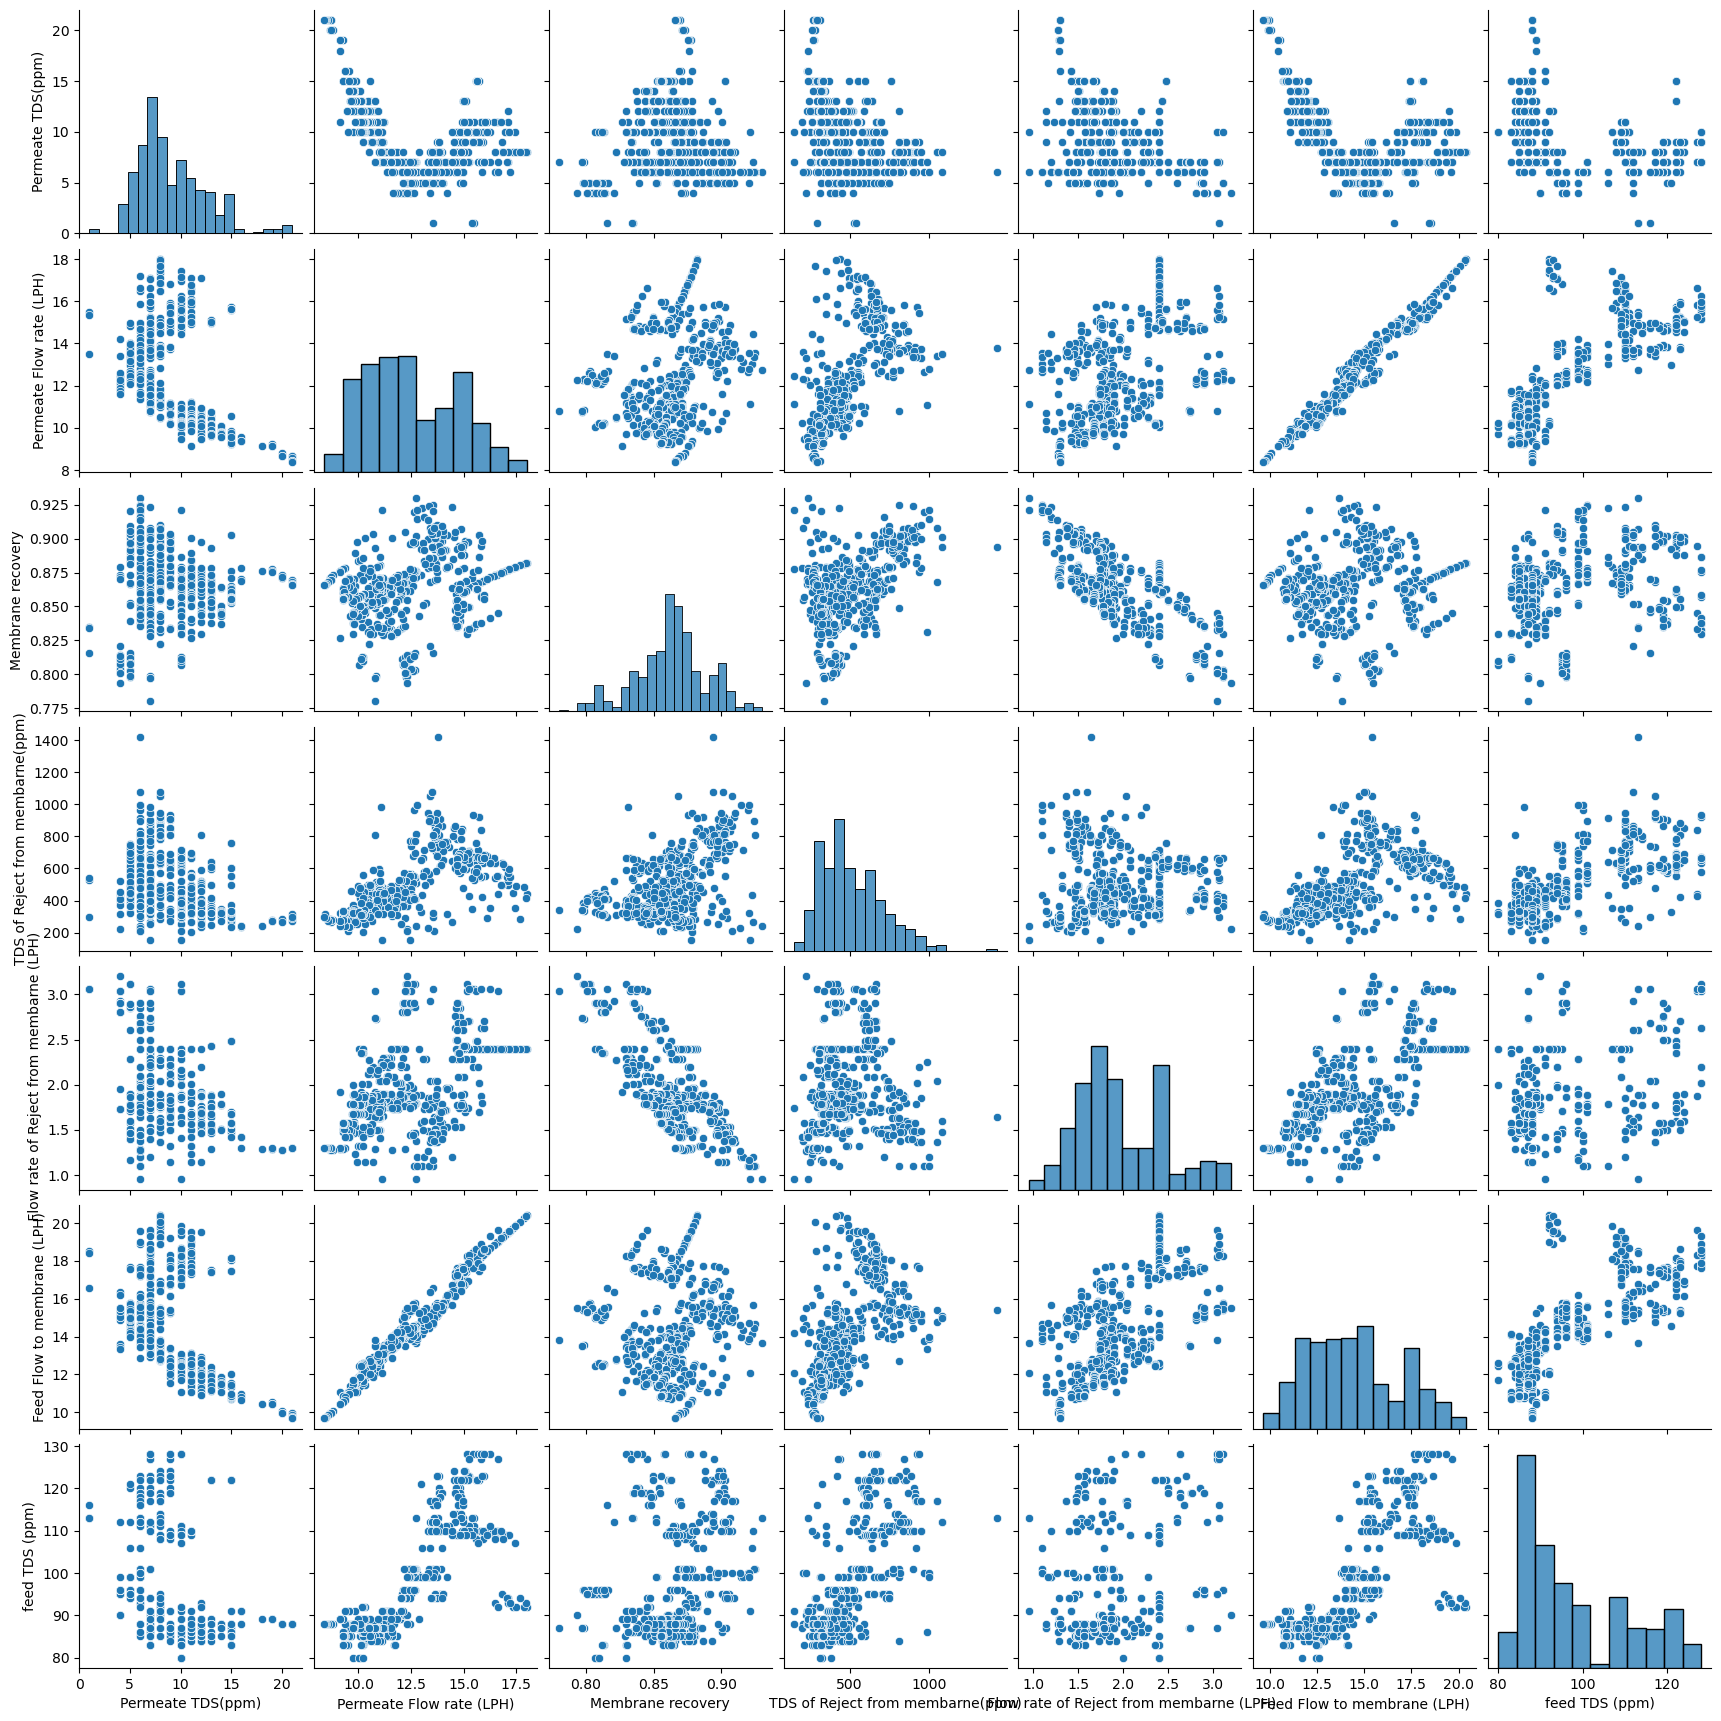

In [8]:
sns.pairplot(df)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15952\3168105200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Permeate Flow rate (LPH)'])


<Axes: xlabel='Permeate Flow rate (LPH)', ylabel='Density'>

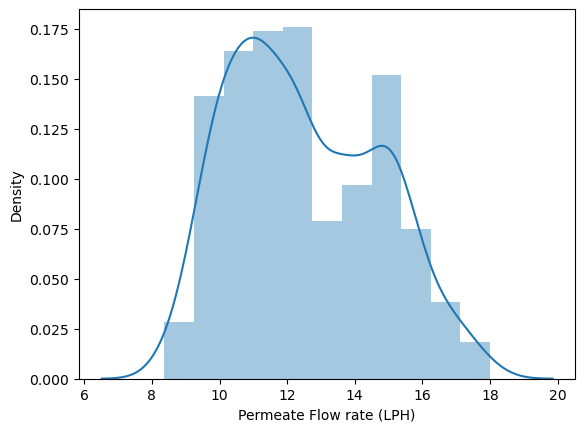

In [9]:
sns.distplot(df['Permeate Flow rate (LPH)'])

## Correlation coefficient heatmap:

In [10]:
corr_matrix = df.corr()

<Axes: >

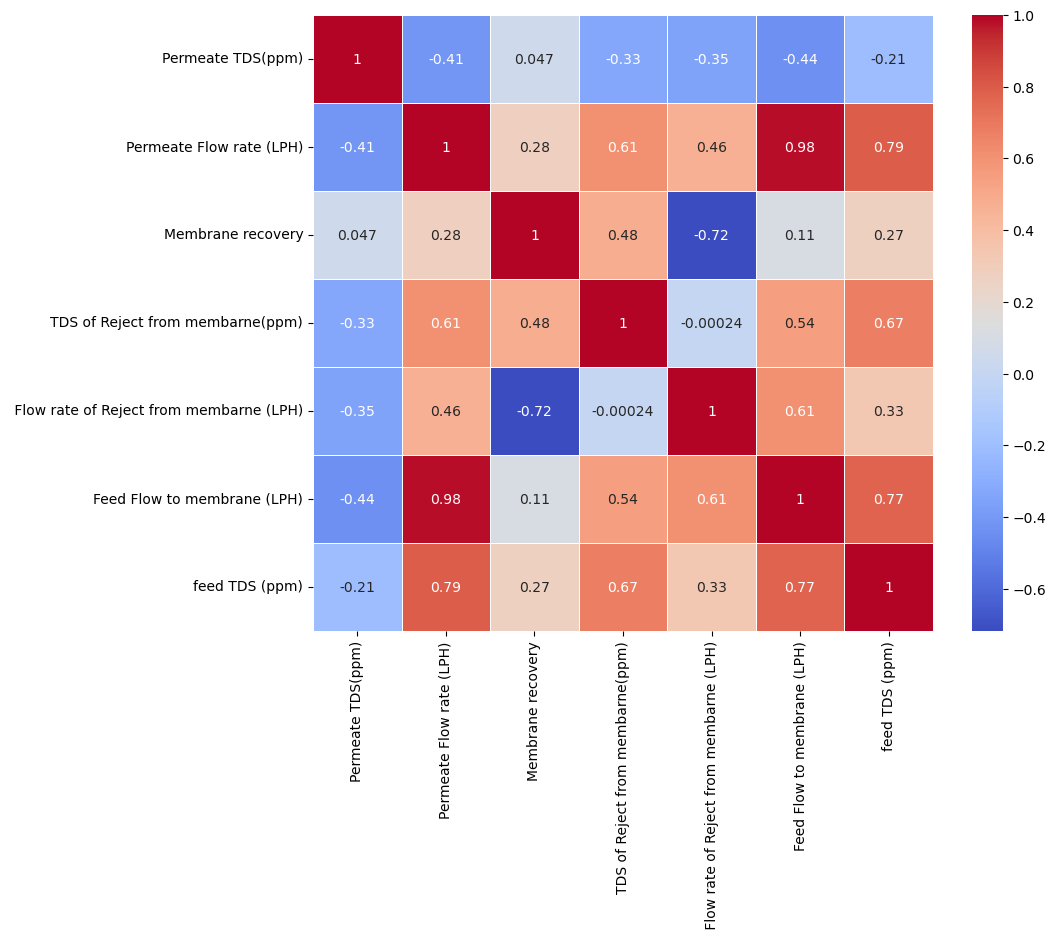

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

## Define features and target

In [12]:
X = df.drop('Permeate Flow rate (LPH)', axis=1)
y = df['Permeate Flow rate (LPH)']

## Split data into training and testing sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regression Model Training

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
print(lm.intercept_)

-2.842170943040401e-14


In [19]:
lm.coef_

array([ 2.96928022e-16,  2.86628290e-14, -3.06384192e-18, -1.00000000e+00,
        1.00000000e+00, -1.22034938e-17])

In [20]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Permeate TDS(ppm),2.969280e-16
Membrane recovery,2.866283e-14
TDS of Reject from membarne(ppm),-3.063842e-18
Flow rate of Reject from membarne (LPH),-1.000000e+00
Feed Flow to membrane (LPH),1.000000e+00
feed TDS (ppm),-1.220349e-17


## Define hyperparameters for GridSearchCV

In [70]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'n_jobs': [1, 2, 3, 4]
}

## Define scoring metrics for GridSearchCV

In [40]:
scoring = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error']

## Hypyerparameter Tunung using GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV

In [74]:
grid_search = GridSearchCV(lm, param_grid, cv=5, scoring=scoring, refit='neg_mean_squared_error',verbose=1)
grid_search.fit(X_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [1, 2, 3, 4],
                         'positive': [True, False]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error',
                      'neg_mean_squared_log_error',
                      'neg_median_absolute_error'],
             verbose=1)

In [62]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_
print(f"Best Model: {grid_search.best_params_}")

Best Model: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}


In [63]:
# Predict the values using the best model
y_pred = best_model.predict(X_test)

## Calculate the evaluation metrics

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [66]:
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 9.081645983702596e-27
R2 Score: 1.0


# Visualisation

## Scatter plot with regression line:
Plot the true target values (y_test) against the predicted values (y_pred) and draw the regression line. This helps you visualize the relationship between the true and predicted values and assess the performance of the model.

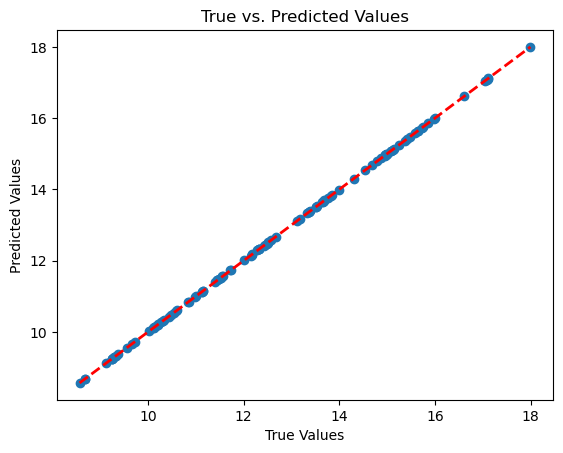

In [67]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

## Residual plot:
Plot the residuals (difference between the true and predicted values) against the predicted values. This helps identify any patterns in the residuals, which could indicate that the model is not capturing some underlying structure in the data

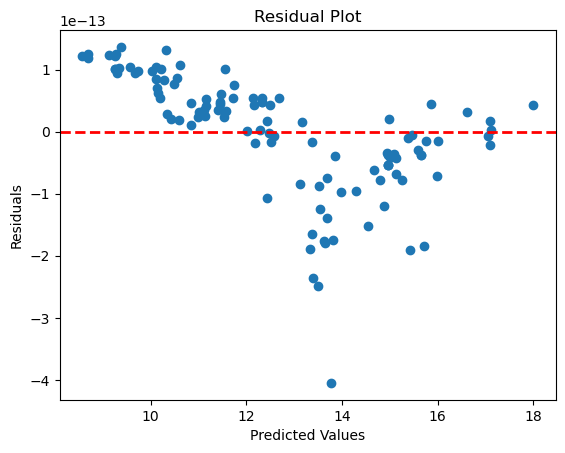

In [68]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Histogram of residuals:
Plot a histogram of the residuals to analyze the distribution of the prediction errors. Ideally, the residuals should follow a normal distribution centered around zero.

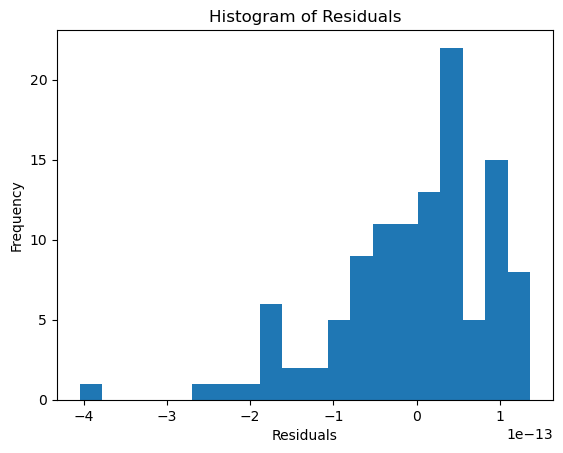

In [69]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()